<a href="https://colab.research.google.com/github/plaban1981/Object-Detection-Yolo/blob/master/YOLO_NAS_custom_object_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO_NAS_Inference

Deep learning firm Deci.ai has recently launched YOLO-NAS. This deep learning model delivers superior real-time object detection capabilities and high performance ready for production. These models were constructed using Deci’s proprietary AutoNAC™ NAS technology. YOLO-NAS is a new real-time state-of-the-art object detection model that outperforms YOLOv7, YOLOv8 & the recently released YOLOv6 3.0 models in terms of mAP and inference latency.

## Download Access

In [14]:
!pip install -qU super-gradients 
!pip install -qU imutils
!pip install -qU pytube
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 964.2/964.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 106.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 98.2 MB/s eta

In [40]:
! pip install git+https://github.com/Deci-AI/super-gradients

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Deci-AI/super-gradients to /tmp/pip-req-build-v9560584
  Running command git clone --filter=blob:none --quiet https://github.com/Deci-AI/super-gradients /tmp/pip-req-build-v9560584
  Resolved https://github.com/Deci-AI/super-gradients to commit 7907c486d1a0bb479c68590ffd5bc8478f9f18b8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for super-gradients: filename=super_gradients-3.1.1+master-py3-none-any.whl size=980929 sha256=12cca90aef3ce74f921fb0ef948b515723d92549d799fb220b2a1dac2e26df1a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9q9bzrbu/wheels/2d/59/09/9dda3

In [3]:
import torch
torch.__version__

'1.13.1+cu117'

In [4]:
torch.cuda.get_device_name(0)

'Tesla T4'

## SuperGradients
SuperGradients is a PyTorch based training library.

It provides a uniform interface for the most common computer vision use cases:

Classification

Detection

Segmentation

Pose estimation

There are nearly 40 pretrained models in our model zoo. You can see the pretrained models available to you by following this [link](https://github.com/Deci-AI/super-gradients/blob/master/documentation/source/model_zoo.md).

This notebook will focus on using SuperGradients with YOLO-NAS.

## Inference with YOLONAS pretrained models

YOLONAS comes in three flavors: 
* yolo_nas_s, 
* yolo_nas_m, and 
* yolo_nas_l.

In [1]:
from super_gradients.training import models

yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

[2023-06-04 07:29:40] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-06-04 07:29:44] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-06-04 07:29:44] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-06-04 07:29:44] WARNING - export.py - Failed to import pytorch_quantization
[2023-06-04 07:29:44] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-06-04 07:29:45] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/256M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


## Display Model Summary

#### Run the below code if interested in architecture

In [5]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [6]:
! pip install torchinfo 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import gc
import os
import torch
from torchinfo import summary
from super_gradients.training import models


summary(model=yolo_nas_l, 
        input_size=(16, 3, 640, 640),
         col_names=["input_size", "output_size", "num_params", "trainable"],
         col_width=20,
        row_settings=["var_names"]
 )

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

## Inference on an image
Once the model has been instantiated all you have to do is call the predict method.

In [50]:
#url = "https://previews.123rf.com/images/freeograph/freeograph2011/freeograph201100150/158301822-group-of-friends-gathering-around-table-at-home.jpg"
url = "https://www.smartcitiesworld.net/AcuCustom/Sitename/DAM/019/Parsons_PR.jpg"
output = yolo_nas_l.predict(url, conf=0.25)
out = yolo_nas_l.predict(url, conf=0.25)

In [47]:
out.save("detected_object.jpg")

In [17]:
out._images_prediction_lst

<generator object Pipeline._generate_prediction_result at 0x7fdd4b9cb680>

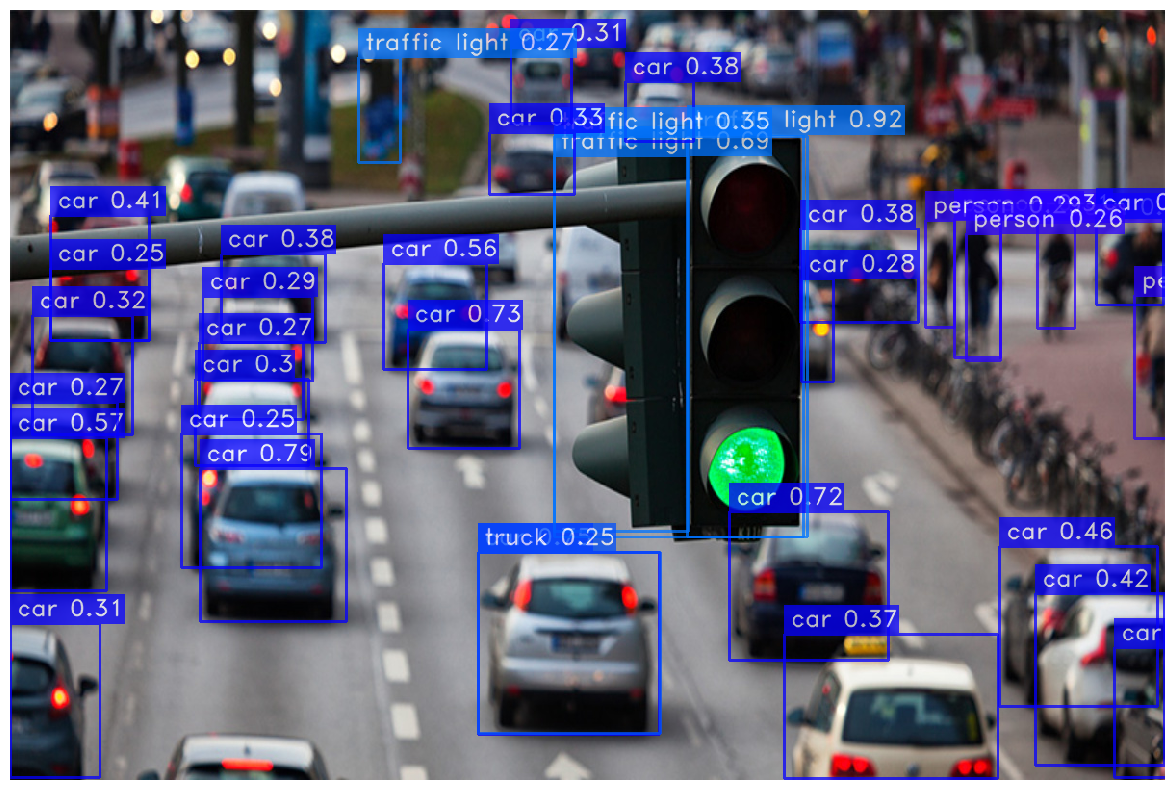

In [53]:
output.show()

## Get predicted bounding boxes and classes in YOLO-NAS

In [51]:
out_lst = list(out._images_prediction_lst)

In [52]:
out_lst

[ImageDetectionPrediction(image=array([[[ 35,  34,  40],
         [ 28,  29,  34],
         [ 22,  25,  30],
         ...,
         [ 44,  39,  36],
         [ 41,  37,  36],
         [ 42,  38,  39]],
 
        [[ 26,  25,  31],
         [ 20,  21,  26],
         [ 15,  18,  23],
         ...,
         [ 42,  37,  34],
         [ 36,  32,  31],
         [ 32,  31,  29]],
 
        [[ 16,  17,  22],
         [ 11,  12,  17],
         [  6,   9,  14],
         ...,
         [ 38,  35,  30],
         [ 28,  27,  23],
         [ 23,  23,  21]],
 
        ...,
 
        [[ 21,  21,  23],
         [ 13,  13,  15],
         [  8,   8,  10],
         ...,
         [122,  61,  66],
         [135,  71,  72],
         [145,  77,  78]],
 
        [[ 20,  20,  22],
         [ 12,  12,  14],
         [  8,   8,  10],
         ...,
         [118,  59,  61],
         [133,  69,  69],
         [144,  76,  73]],
 
        [[ 20,  20,  22],
         [ 12,  12,  14],
         [  8,   8,  10],
         ..

In [32]:
type(out_lst)

list

In [33]:
out_lst[0]

ImageDetectionPrediction(image=array([[[ 35,  34,  40],
        [ 28,  29,  34],
        [ 22,  25,  30],
        ...,
        [ 44,  39,  36],
        [ 41,  37,  36],
        [ 42,  38,  39]],

       [[ 26,  25,  31],
        [ 20,  21,  26],
        [ 15,  18,  23],
        ...,
        [ 42,  37,  34],
        [ 36,  32,  31],
        [ 32,  31,  29]],

       [[ 16,  17,  22],
        [ 11,  12,  17],
        [  6,   9,  14],
        ...,
        [ 38,  35,  30],
        [ 28,  27,  23],
        [ 23,  23,  21]],

       ...,

       [[ 21,  21,  23],
        [ 13,  13,  15],
        [  8,   8,  10],
        ...,
        [122,  61,  66],
        [135,  71,  72],
        [145,  77,  78]],

       [[ 20,  20,  22],
        [ 12,  12,  14],
        [  8,   8,  10],
        ...,
        [118,  59,  61],
        [133,  69,  69],
        [144,  76,  73]],

       [[ 20,  20,  22],
        [ 12,  12,  14],
        [  8,   8,  10],
        ...,
        [115,  59,  60],
        [133,  69,

In [37]:
len(out_lst)

1

## Extract confidence scores, labels predicted and bounding boxes from predictions

In [34]:
prediction_objects = out_lst[0]
bboxes = prediction_objects.prediction.bboxes_xyxy
scores = prediction_objects.prediction.confidence
int_labels = prediction_objects.prediction.labels.astype(int)
class_names = prediction_objects.class_names
pred_classes = [class_names[i] for i in int_labels]

In [40]:
print(pred_classes)

['traffic light', 'car', 'car', 'car', 'car', 'traffic light', 'car', 'car', 'car', 'car', 'person', 'car', 'car', 'car', 'car', 'car', 'traffic light', 'car', 'car', 'person', 'car', 'car', 'person', 'car', 'person', 'car', 'car', 'car', 'car', 'traffic light', 'car', 'car', 'person', 'truck', 'car', 'car']


In [41]:
print(bboxes)

[[7.03706848e+02 1.29100235e+02 8.24495789e+02 5.47940613e+02]
 [1.97380096e+02 4.76307648e+02 3.49927094e+02 6.35392212e+02]
 [4.86105957e+02 5.63709717e+02 6.74819641e+02 7.52067688e+02]
 [4.13818756e+02 3.31805054e+02 5.29970215e+02 4.55188782e+02]
 [7.47242065e+02 5.21481689e+02 9.12167725e+02 6.75715332e+02]
 [5.65586670e+02 1.51215546e+02 7.04090881e+02 5.41505493e+02]
 [4.68941450e-01 4.44072510e+02 1.00213844e+02 6.03559814e+02]
 [3.88995209e+02 2.63846588e+02 4.95716583e+02 3.73187653e+02]
 [1.02866504e+03 5.57862427e+02 1.19280762e+03 7.23825134e+02]
 [1.06507959e+03 6.06076050e+02 1.19970337e+03 7.84491211e+02]
 [1.06743616e+03 2.20018066e+02 1.10651208e+03 3.30369934e+02]
 [4.29818192e+01 2.13259369e+02 1.44536240e+02 3.43086945e+02]
 [8.21897339e+02 2.27821198e+02 9.43313965e+02 3.24640625e+02]
 [2.19165466e+02 2.53964859e+02 3.27452850e+02 3.45521790e+02]
 [6.39626709e+02 7.45575485e+01 7.10959106e+02 1.36950714e+02]
 [8.04464905e+02 6.48190369e+02 1.02671558e+03 7.985699

In [60]:
detections = ""
for score, label, box in zip(scores, pred_classes, bboxes):
        detections += '[{}, {}, {}, {}]'.format(int(box[0]), int(box[1]), int(box[2]), int(box[3]))
        detections += ' {}'.format(label)
        detections += ' {}\n'.format(float(score))

In [61]:
detections

'[703, 129, 824, 547] traffic light 0.918594241142273\n[197, 476, 349, 635] car 0.7903203964233398\n[486, 563, 674, 752] car 0.7476022243499756\n[413, 331, 529, 455] car 0.7325229644775391\n[747, 521, 912, 675] car 0.7212222218513489\n[565, 151, 704, 541] traffic light 0.6881255507469177\n[0, 444, 100, 603] car 0.5659724473953247\n[388, 263, 495, 373] car 0.560289740562439\n[1028, 557, 1192, 723] car 0.46172165870666504\n[1065, 606, 1199, 784] car 0.41542038321495056\n[1067, 220, 1106, 330] person 0.41185006499290466\n[42, 213, 144, 343] car 0.4055573046207428\n[821, 227, 943, 324] car 0.38270315527915955\n[219, 253, 327, 345] car 0.37911543250083923\n[639, 74, 710, 136] car 0.37646979093551636\n[804, 648, 1026, 798] car 0.3693089783191681\n[565, 131, 828, 547] traffic light 0.349809855222702\n[498, 127, 586, 191] car 0.33033090829849243\n[23, 317, 127, 441] car 0.3249709904193878\n[1168, 296, 1201, 445] person 0.3160609304904938\n[0, 637, 93, 797] car 0.31462526321411133\n[520, 39, 58

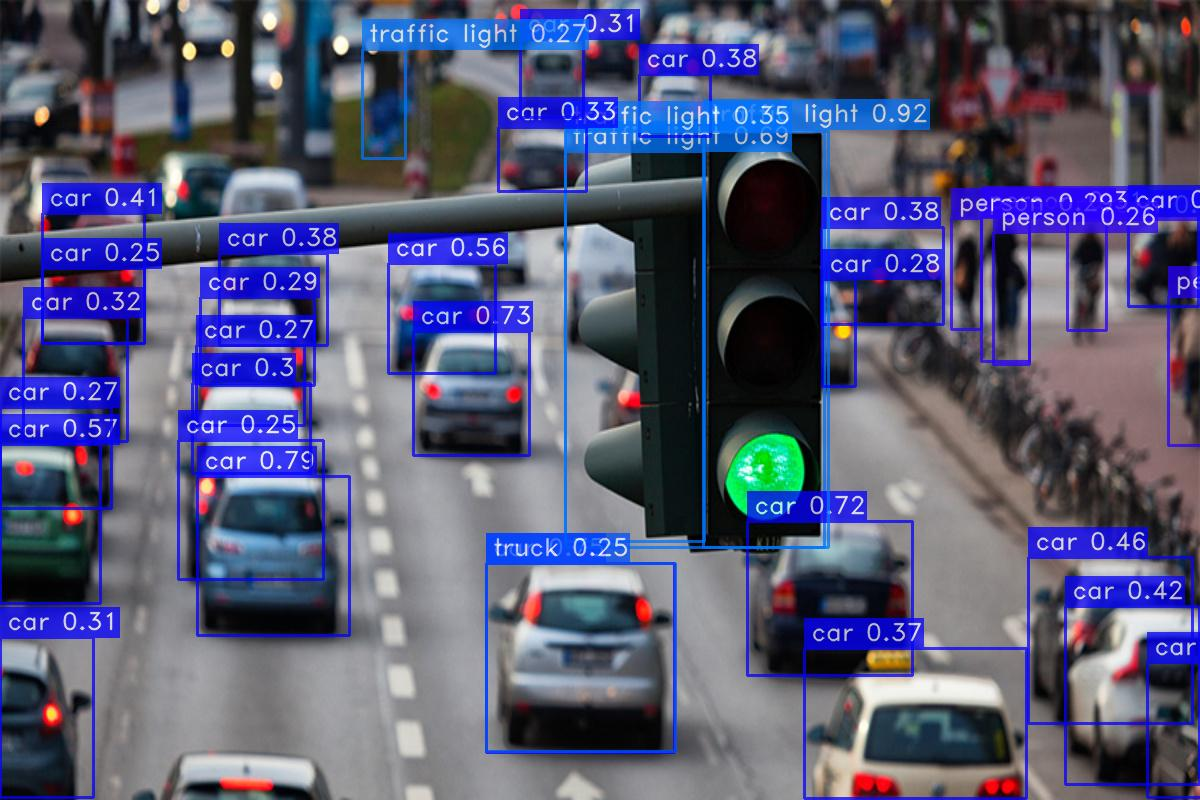

In [69]:
import PIL
from IPython.display import display
import matplotlib.pyplot as plt
display(PIL.Image.open("/content/detected_object.jpg/pred_0.jpg"))


## Download Training data

In [11]:
!git clone https://github.com/AarohiSingla/YOLO-NAS.git

Cloning into 'YOLO-NAS'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 4), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (21/21), 2.99 MiB | 10.89 MiB/s, done.


In [12]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
import shutil
shutil.move("/content/YOLO-NAS/FallDetection","/content/drive/MyDrive/YOLO_NAS")

'/content/drive/MyDrive/YOLO_NAS/FallDetection'